<a href="https://colab.research.google.com/github/SSRaylia/Prediction-Using-Machine-Learning/blob/master/Bank_Call_Center_Success_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Call Center Success Rate Prediction

![替代文字](https://aircall.io/blog/wp-content/uploads/2016/11/contact-center-vs.-call-center.png)

### **Data**: The data is a public data set related with direct marketing campaigns (phone calls) of a Euro banking institution. 

### **Goal**: The classification goal is to a build prediction model for campaign in future.

# 1. Data Ingestion

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats

%matplotlib inline

In [2]:
call = pd.read_csv("https://raw.githubusercontent.com/SSRaylia/Prediction-Using-Machine-Learning/master/BankCallCenter.csv")
call.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term deposit?
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 2. Data Preparation and EDA

## 2.1 Transform Categorical Data to Numerical Value*

*** *One thing should be noted is that transforming categorical data to numerical value does not work well when the raw data is not boolean or does not has any sequence in nature. Here we transformed these kinds of data (like Job, Contact Option) to number for clustering and prediction but there is still room left for consideration on how to better leverage on these categorical values.***

---



In [3]:
np.unique(call['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [0]:
for df in [call]:
    df['job_n']=df['job'].map({'admin.':11, 'blue-collar':4, 'entrepreneur':10, 'housemaid':3, 'management':9,'retired':5,'self-employed':7, 'services':6, 'student':2, 'technician':8,'unemployed':1, 'unknown':0})

In [5]:
np.unique(call['marital'])

array(['divorced', 'married', 'single'], dtype=object)

In [0]:
for df in [call]:
    df['marital_n']=df['marital'].map({'divorced':2,'married':3,'single':1})

In [7]:
np.unique(call['education'])

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [0]:
for df in [call]:
    df['education_n']=df['education'].map({'primary':1, 'secondary':2, 'tertiary':3, 'unknown':0})

In [9]:
np.unique(call['default'])

array(['no', 'yes'], dtype=object)

In [0]:
for df in [call]:
    df['default']=df['default'].map({'yes':1,'no':0})

In [11]:
np.unique(call['housing'])

array(['no', 'yes'], dtype=object)

In [0]:
for df in [call]:
    df['housing']=df['housing'].map({'yes':1,'no':0})

In [13]:
np.unique(call['loan'])

array(['no', 'yes'], dtype=object)

In [0]:
for df in [call]:
    df['loan']=df['loan'].map({'yes':1,'no':0})

In [15]:
np.unique(call['contact'])

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [0]:
for df in [call]:
    df['contact_n']=df['contact'].map({'cellular':1, 'telephone':2, 'unknown':0})

In [17]:
np.unique(call['poutcome'])

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [0]:
for df in [call]:
    df['poutcome_n']=df['poutcome'].map({'failure':1, 'other':2, 'success':3, 'unknown':0})

In [19]:
np.unique(call['Term deposit?'])

array(['no', 'yes'], dtype=object)

In [0]:
for df in [call]:
    df['Term Deposit']=df['Term deposit?'].map({'yes':1,'no':0})

In [21]:
np.unique(call['month'])

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [0]:
for df in [call]:
    df['month']=df['month'].map({'apr':4, 'aug':8, 'dec':12, 'feb':2, 'jan':1, 'jul':7, 'jun':6, 'mar':3, 'may':5,'nov':11, 'oct':10, 'sep':9})

## 2.2 EDA

### 2.2.1 Using heatmap to check correlation between variables.

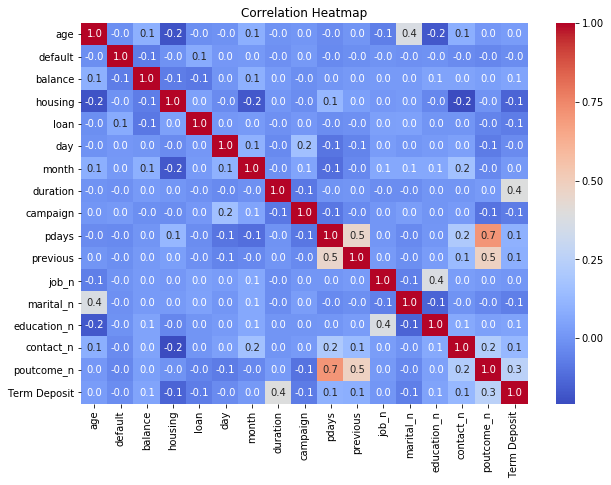

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(call.corr(),annot=True,fmt='.1f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Here only durantion and poutcome (previous campaign outcome) jump out as highly correlated attributes with Term Deposit (whether the cusomter subscribe the Term Deposit product after the sales call or not).

### 2.2.2 Checking Customer Age Distribution

In [0]:
sns.set(color_codes=True)

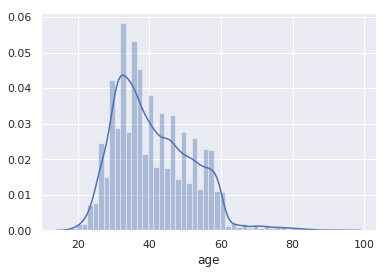

In [25]:
sns.distplot(call['age'])

### 2.2.3 Checking Relations between Term Deposit and Each Attribute Separately

#### a. Job Role

Text(0, 0.5, 'successrate')

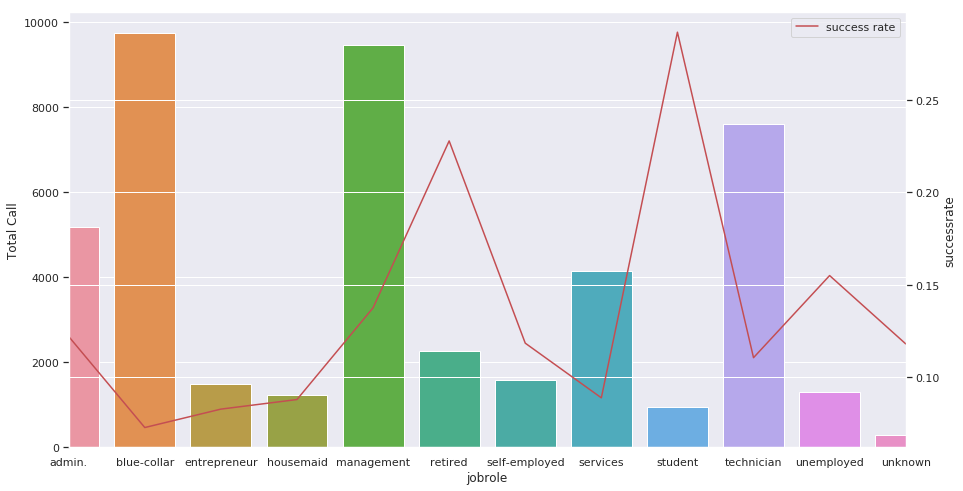

In [26]:
jobgroup = call.groupby('job')['Term Deposit'].sum()/call.groupby('job')['Term Deposit'].count()
jobcount = call.groupby('job')['Term Deposit'].count()

jobgroup = pd.DataFrame({'jobrole':jobgroup.index, 'success rate':jobgroup.values})
jobcount = pd.DataFrame({'jobrole':jobcount.index, 'total':jobcount.values})

jobgroup.set_index(['jobrole'], inplace = True) 
jobcount.set_index(['jobrole'], inplace = True) 

plt.subplots(figsize=(15,8))
ax = sns.barplot(x=jobcount.index, y="total", data=jobcount)
ax.set_ylabel('Total Call')

ax2 = ax.twinx()
jobgroup.plot(ax=ax2,color='r')
ax2.set_ylabel('successrate')

#### b. Marital Status

Text(0, 0.5, 'successrate')

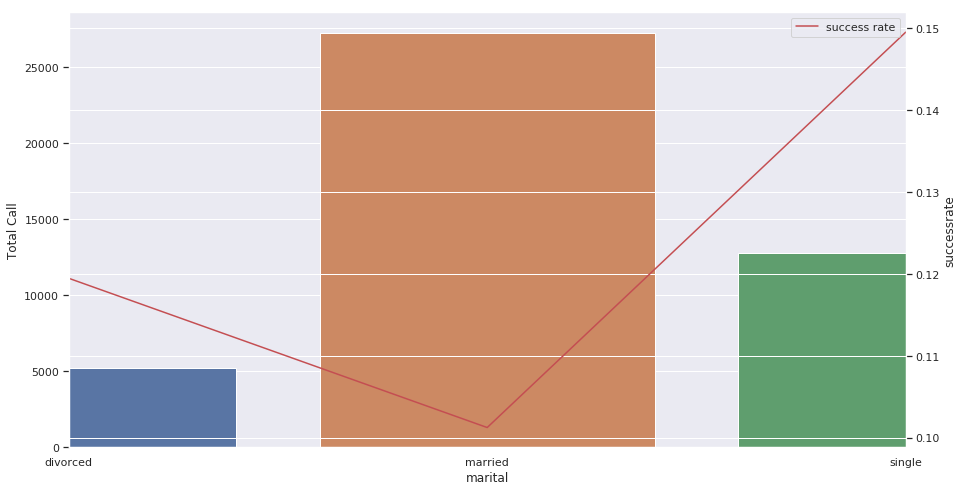

In [27]:
mgroup = call.groupby('marital')['Term Deposit'].sum()/call.groupby('marital')['Term Deposit'].count()
mcount = call.groupby('marital')['Term Deposit'].count()

mgroup = pd.DataFrame({'marital':mgroup.index, 'success rate':mgroup.values})
mcount = pd.DataFrame({'marital':mcount.index, 'total':mcount.values})

mgroup.set_index(['marital'], inplace = True) 
mcount.set_index(['marital'], inplace = True) 

plt.subplots(figsize=(15,8))
ax = sns.barplot(x=mcount.index, y="total", data=mcount)
ax.set_ylabel('Total Call')

ax2 = ax.twinx()
mgroup.plot(ax=ax2,color='r')
ax2.set_ylabel('successrate')

#### c. Education Level

Text(0, 0.5, 'successrate')

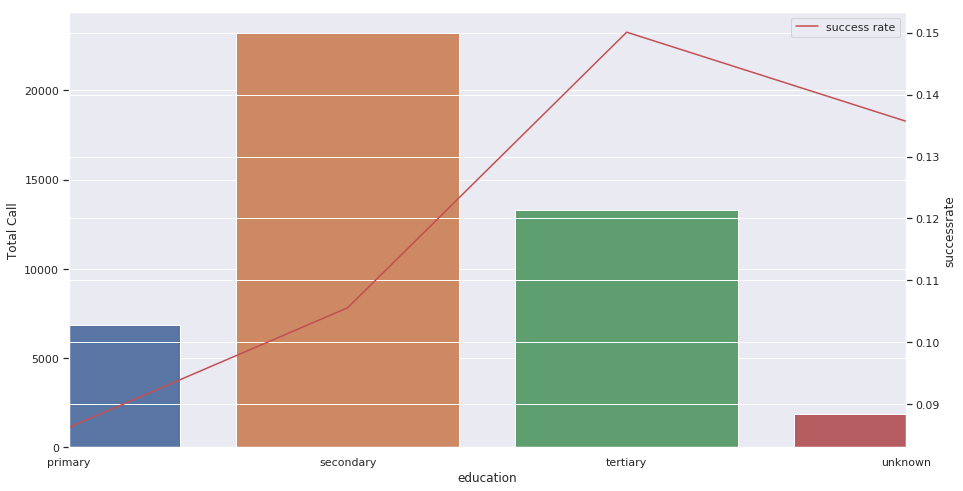

In [60]:
mgroup = call.groupby('education')['Term Deposit'].sum()/call.groupby('education')['Term Deposit'].count()
mcount = call.groupby('education')['Term Deposit'].count()

mgroup = pd.DataFrame({'education':mgroup.index, 'success rate':mgroup.values})
mcount = pd.DataFrame({'education':mcount.index, 'total':mcount.values})

mgroup.set_index(['education'], inplace = True) 
mcount.set_index(['education'], inplace = True) 

plt.subplots(figsize=(15,8))
ax = sns.barplot(x=mcount.index, y="total", data=mcount)
ax.set_ylabel('Total Call')

ax2 = ax.twinx()
mgroup.plot(ax=ax2,color='r')
ax2.set_ylabel('successrate')

#### d. Duration

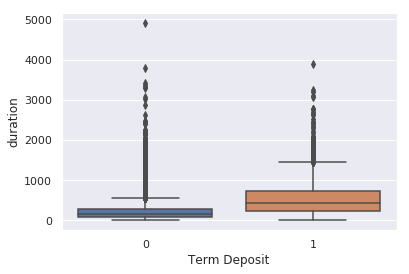

In [29]:
sns.boxplot('Term Deposit','duration',data=call)

#### e. Account Balance

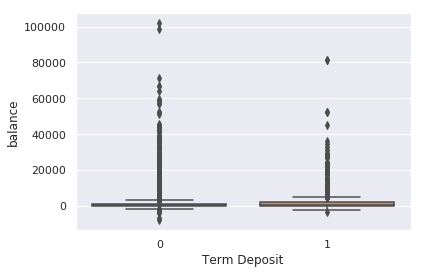

In [30]:
sns.boxplot('Term Deposit','balance',data=call)

#### f. Default History

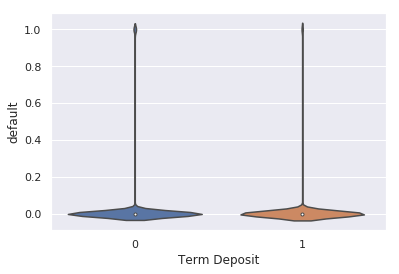

In [31]:
sns.violinplot(data=df, y= 'default', x='Term Deposit')

#### g. Housing

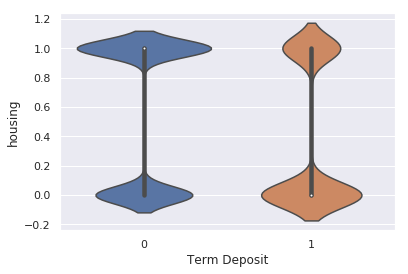

In [32]:
sns.violinplot(data=df, y= 'housing', x='Term Deposit')

#### h. Loan

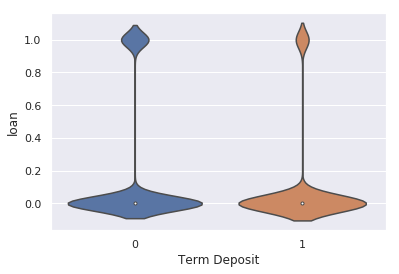

In [33]:
sns.violinplot(data=df, y= 'loan', x='Term Deposit')

# 3. PCA on Customers Who Subscribed TD After Sales Call

In [0]:
#dropping categorical data
call_new = call.drop(['job','marital','education','contact','poutcome','Term deposit?'],axis=1)

In [0]:
#Call out customer that has subscribed Term Deposit after the call
call_new2 = call_new.loc[call_new['Term Deposit']==1]

In [37]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
call_new2 = call_new2.drop(['previous','pdays','Term Deposit','month','day','campaign','job_n','contact_n'],axis=1)
scaled_df = StandardScaler().fit_transform(call_new2)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
#Calculate Eigon Value
features = scaled_df.T
covariance_matrix = np.cov(features)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

[0.18430818 0.16612757 0.115087   0.10768096 0.10409909 0.09901122
 0.09411485 0.07664365]


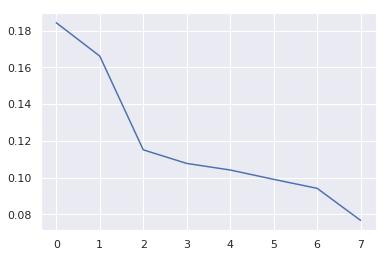

In [39]:
#Draw the line chart on how much variance is explained by x principle components
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
pca.fit(scaled_df)
plt.plot(pca.explained_variance_ratio_[:10])
print(pca.explained_variance_ratio_)

Here we can see the first 4 principle components explained 57% of the variance in total.

In [40]:
#Principle Component One
components = pd.DataFrame(pca.components_[:5], columns = call_new2.columns)
component_1 = components.iloc[0,:]
component_1[abs(component_1)>0.3]

age          0.593289
housing     -0.341818
marital_n    0.471614
Name: 0, dtype: float64

In [41]:
#Principle Component Two
component_2 = components.iloc[1,:]
component_2[abs(component_2)>0.3]

age            0.304708
housing        0.329057
loan           0.313123
duration       0.490174
marital_n      0.409871
education_n   -0.370545
poutcome_n    -0.355154
Name: 1, dtype: float64

In [42]:
#Principle Component Three
component_3 = components.iloc[2,:]
component_3[abs(component_3)>0.3]

default      -0.569922
balance       0.597779
duration      0.339174
poutcome_n   -0.302527
Name: 2, dtype: float64

In [61]:
#Principle Component Four
component_4 = components.iloc[3,:]
component_4[abs(component_4)>0.3]

default       0.694920
balance       0.381214
housing      -0.353848
poutcome_n   -0.413422
Name: 3, dtype: float64

# 4. Prediction Model

## 4.1 Split the Dataset

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [0]:
# Split the dependant and independant variables
X = call_new.iloc[:, :-1].values
y = call_new.iloc[:, -1].values
# Splitting the data into Training set & Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 4.2 Logistic Regression

In [63]:
#Building Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)
predict1 = log.predict(X_test)
AS1=accuracy_score(y_test,predict1)
print('Accuracy Score: ',AS1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score:  0.8951675328983745


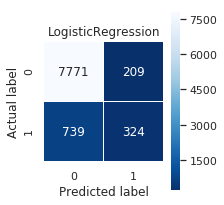

In [64]:
#Check Model Performance
cm = metrics.confusion_matrix(y_test, predict1)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('LogisticRegression', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
results1 = confusion_matrix(y_test, predict1)
print('Confusion Matrix :')
print(results1)

precision1 = precision_score(y_test, predict1)
print('Precision_LogisticRegression: %f' % precision1)

recall1 = recall_score(y_test, predict1)
print('Recall_LogisticRegression: %f' % recall1)

auc1 = roc_auc_score(y_test, predict1)
print('ROC AUC_LogisticRegression: %f' % auc1)

Confusion Matrix :
[[7771  209]
 [ 739  324]]
Precision_LogisticRegression: 0.607880
Recall_LogisticRegression: 0.304798
ROC AUC_LogisticRegression: 0.639304


## 4.3 RadonForest

In [66]:
#Building Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
predict2 = rfc.predict(X_test)
AS2=accuracy_score(y_test,predict2)
print('Accuracy Score: ',AS2)

Accuracy Score:  0.8823399314386818


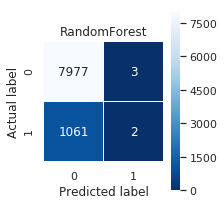

In [67]:
#Check Model Performance
cm = metrics.confusion_matrix(y_test, predict2)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('RandomForest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
results2 = confusion_matrix(y_test, predict2)
print('Confusion Matrix :')
print(results2) 

precision2 = precision_score(y_test, predict2)
print('Precision_RandomForest: %f' % precision2)

recall2 = recall_score(y_test, predict2)
print('Recall_Randomforest: %f' % recall2)

auc2 = roc_auc_score(y_test, predict2)
print('ROC AUC_RandomForest: %f' % auc2)

Confusion Matrix :
[[7977    3]
 [1061    2]]
Precision_RandomForest: 0.400000
Recall_Randomforest: 0.001881
ROC AUC_RandomForest: 0.500753


## 4.4 AutoML

In [53]:
!apt-get install default-jre
!java -version

!pip install -q h2o

import h2o
from h2o.automl import H2OAutoML

h2o.init()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
openjdk version "11.0.2" 2019-01-15
OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3)
OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
     |████████████████████████████████| 121.8MB 175kB/s 
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Star

H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_unknownUser_3aecp2
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [69]:
#Building Model
df = h2o.H2OFrame(call_new)
train, valid, test = df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Term Deposit"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows in train, valid and test set :  27171 9053 8987


In [70]:
predictors = df.columns[:-1]
aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [71]:
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190509_202714,0.932572,0.200942,0.174115,0.250889,0.0629453


In [72]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
xgbc.fit(X_train, y_train)
predict3 = xgbc.predict(X_test)
AS3=accuracy_score(y_test,predict3)
print('Accuracy Score: ',AS3)

Accuracy Score:  0.9000331748313612


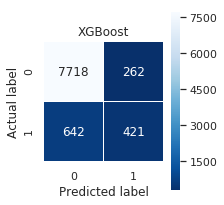

In [73]:
#Check Model Performance
cm = metrics.confusion_matrix(y_test, predict3)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('XGBoost', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
results3 = confusion_matrix(y_test, predict3)
print('Confusion Matrix :')
print(results3) 

precision3 = precision_score(y_test, predict3)
print('Precision_RandomForest: %f' % precision3)

recall3 = recall_score(y_test, predict3)
print('Recall_Randomforest: %f' % recall3)

auc3 = roc_auc_score(y_test, predict3)
print('ROC AUC_RandomForest: %f' % auc3)

Confusion Matrix :
[[7718  262]
 [ 642  421]]
Precision_RandomForest: 0.616398
Recall_Randomforest: 0.396049
ROC AUC_RandomForest: 0.681608


## 4.4 Summary

In [75]:
mmss = [['LogisticRegression', AS1, precision1,recall1,auc1], ['RandomForest',AS2, precision2,recall2,auc2],['AutoML - XGBoost',AS3, precision3,recall3,auc3]]   
ms = pd.DataFrame(mmss, columns = ['Model','Accuracy Score', 'Precision','Recall','AUC'])  
ms

,Model,Accuracy Score,Precision,Recall,AUC
0,LogisticRegression,0.895168,0.607880,0.304798,0.639304
1,RandomForest,0.882340,0.400000,0.001881,0.500753
2,AutoML - XGBoost,0.900033,0.616398,0.396049,0.681608


## 4.5 Interpretation and Conclusion

**Accuracy Score**: No. of records predicted correctly. ***XGBoost has the highest accuracy rate.***

**Precision**：Precision is the number of document retrieved that are relevant (tp / (tp + fp)). High precision score means low **false positive**". ***XGBoost has the fewer false positive errors.***

**Recall**：Recall is the number of relevant document that are retrieved (tp / (tp + fn)). High recall score means low "**false negative**". ***XGBoost has the fewest false negative errors***.

**Two Types of Error:**

In statistical hypothesis testing a type I error is the acceptance of a false hypothesis (also known as a "**false positive**" finding or conclusion), while a type II error is the rejection of a true hypothesis (also known as a "**false negative**" finding or conclusion). In this case, "**false negative**" means predicting a customer subscribed Term Deposit as not subscribing and "**false positive**" means predicting a customer not subscirbing any Term Deposit as subscribed. Since it is much more serious of "**false negative**" (that may lead to loss in potential sales), so the ideal model is the one that makes fewer "**false negative**" predictions, which is **XGBoost**.

**AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve:** also called "AUROC (Area Under the Receiver Operating Characteristics)". ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at distinguishing between customers subscribed Term Deposit and those who didn't. We can see **XGBoost also has the highest AUC**.

## **Therefore, we should choose XGBoost model.**